# End to end ML pipeline
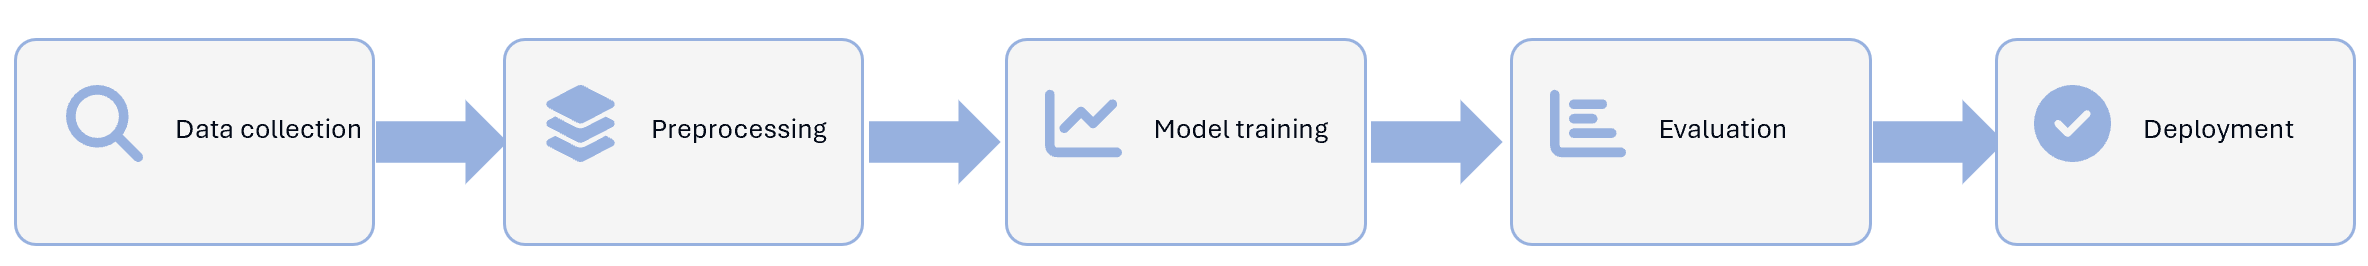

## Load Dataset

Load a dataset into a pandas DataFrame from the local environment or a remote source.


I will import the necessary libraries and I will load the Iris dataset from a public URL.



In [1]:
import pandas as pd
import os

# List files in the current directory
files = os.listdir('.')
print(f"Files in directory: {files}")

# Identify data files
data_files = [f for f in files if f.endswith('.csv') or f.endswith('.xlsx')]

if data_files:
    target_file = data_files[0]
    print(f"Loading local file: {target_file}")
    if target_file.endswith('.csv'):
        df = pd.read_csv(target_file)
    else:
        df = pd.read_excel(target_file)
else:
    print("No local data files found. Loading Iris dataset from URL.")
    url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
    df = pd.read_csv(url)

# Display the first five rows
df.head()

Files in directory: ['EDA_Iris_With_LogReg1.ipynb', 'end_to_end_pipeline.ipynb']
No local data files found. Loading Iris dataset from URL.


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Preprocessing

### Install Profiling Library

#### Subtask:
Install the `ydata-profiling` library to enable automated data analysis.


Install the `ydata-profiling` library using the pip package manager as required because it is not already installed in google colab.



In [2]:
#!pip install ydata-profiling

Verify the installation of `ydata-profiling` by importing the `ProfileReport` class as required.



In [3]:
from ydata_profiling import ProfileReport
print("ydata-profiling installation verified. ProfileReport imported successfully.")

ydata-profiling installation verified. ProfileReport imported successfully.


### Generate Profiling Report

Generate and display an interactive profiling report using the `ydata-profiling` library to summarize the dataset's characteristics.


Generate a profiling report for the loaded DataFrame using ydata-profiling and display it in the notebook.



In [4]:
#pip install ipywidgets

In [5]:
# Initialize the ProfileReport
profile = ProfileReport(df, title="Iris Dataset Profiling Report")

# Display the report in the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 192.40it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Save Profiling Report

Export the generated `ProfileReport` object to a local HTML file named 'profiling_report.html'.


export the `ProfileReport` object to an HTML file and verify its creation in the local directory.



In [6]:
import os

# Save the profiling report to an HTML file
profile.to_file(output_file="profiling_report.html")

# Verify the file creation
files = os.listdir('.')
if 'profiling_report.html' in files:
    print("Successfully saved 'profiling_report.html'.")
else:
    print("Failed to save 'profiling_report.html'.")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Successfully saved 'profiling_report.html'.


### Summary:

#### Q&A
**How was the profiling report for the Iris dataset generated and saved?**
The Iris dataset was processed using the `ydata-profiling` library to create a `ProfileReport` object. This object was then exported to the local file system as an interactive HTML file named "profiling_report.html" using the `.to_file()` method.

#### Data Analysis Key Findings
*   The Iris dataset, sourced from a remote CSV, was successfully loaded and analyzed to produce a comprehensive profiling report.
*   The profiling process automatically generated detailed summaries, including variable distributions, correlations, and data quality metrics.
*   The final output, "profiling_report.html", was verified to exist in the current working directory, confirming the successful completion of the export.



Visualize the Iris dataset by generating a pair plot color-coded by species, and create box and violin plots for sepal and petal measurements using `matplotlib` and `seaborn` to analyze their distributions.

I will import the required visualization libraries, matplotlib.pyplot and seaborn, and set the default theme as specified in the instructions.



In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Apply the default Seaborn aesthetic
sns.set_theme()
print("Visualization libraries imported and theme set successfully.")

Visualization libraries imported and theme set successfully.


### Generate a pair plot

Create a seaborn pairplot of the DataFrame 'df' to visualize the relationships between all features, using 'species' for color coding.


generate a pair plot using seaborn's `pairplot` function, color-coded by the 'species' column, to visualize the relationships between all numerical features in the Iris dataset.



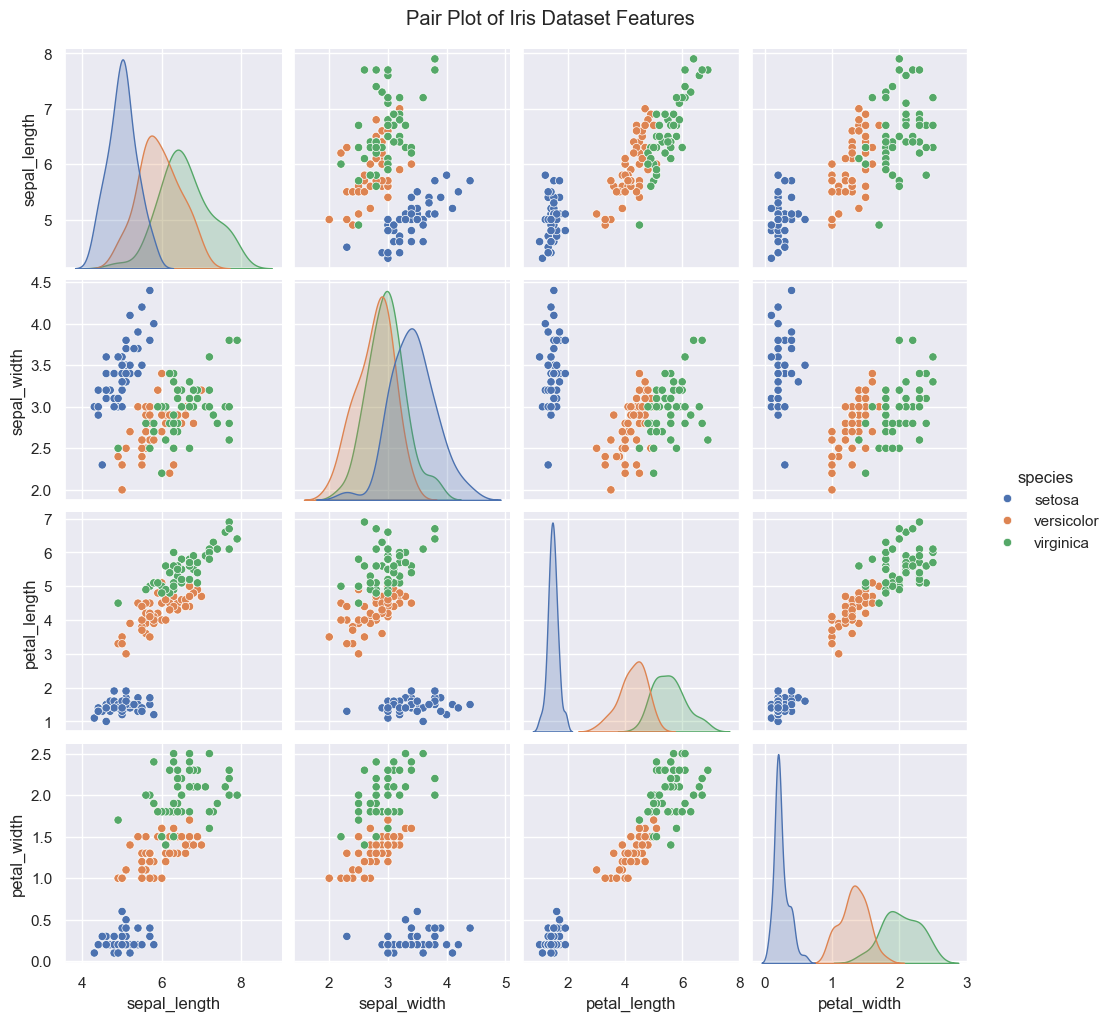

In [24]:
# Generate a pair plot color-coded by species
sns.pairplot(df, hue='species')
plt.suptitle("Pair Plot of Iris Dataset Features", y=1.02)
plt.show()

### Generate distribution plots

Create box plots and violin plots for the sepal and petal measurements to analyze the distributions across different iris species.


### Summary:

#### Data Analysis Key Findings

* **Species Separability**: The pair plot reveals that the *setosa* species is distinctly separated from *versicolor* and *virginica* across almost all feature combinations, particularly in petal measurements.
* **Feature Correlation**: There is a strong positive correlation between petal length and petal width across all species, suggesting these two features are highly redundant but powerful for classification.
* **Species Overlap**: While *setosa* is isolated, *versicolor* and *virginica* show significant overlap in sepal length and sepal width, making those features less effective for distinguishing between these two specific categories.
* **Feature Distributions**: The diagonal density plots in the pair plot indicate that petal length and petal width exhibit multimodal distributions, reflecting the clear physical differences between the three iris species.


### Generate Distribution Plots


Generate box plots and violin plots for the sepal and petal measurements of the Iris dataset using Seaborn to analyze species distributions, and provide a detailed educational guide explaining the significance and use of pair plots, box plots, and violin plots in exploratory data analysis.


I will create a multi-plot figure using matplotlib and seaborn to display box plots and violin plots for each of the four Iris features, categorized by species, as requested in the subtask instructions.



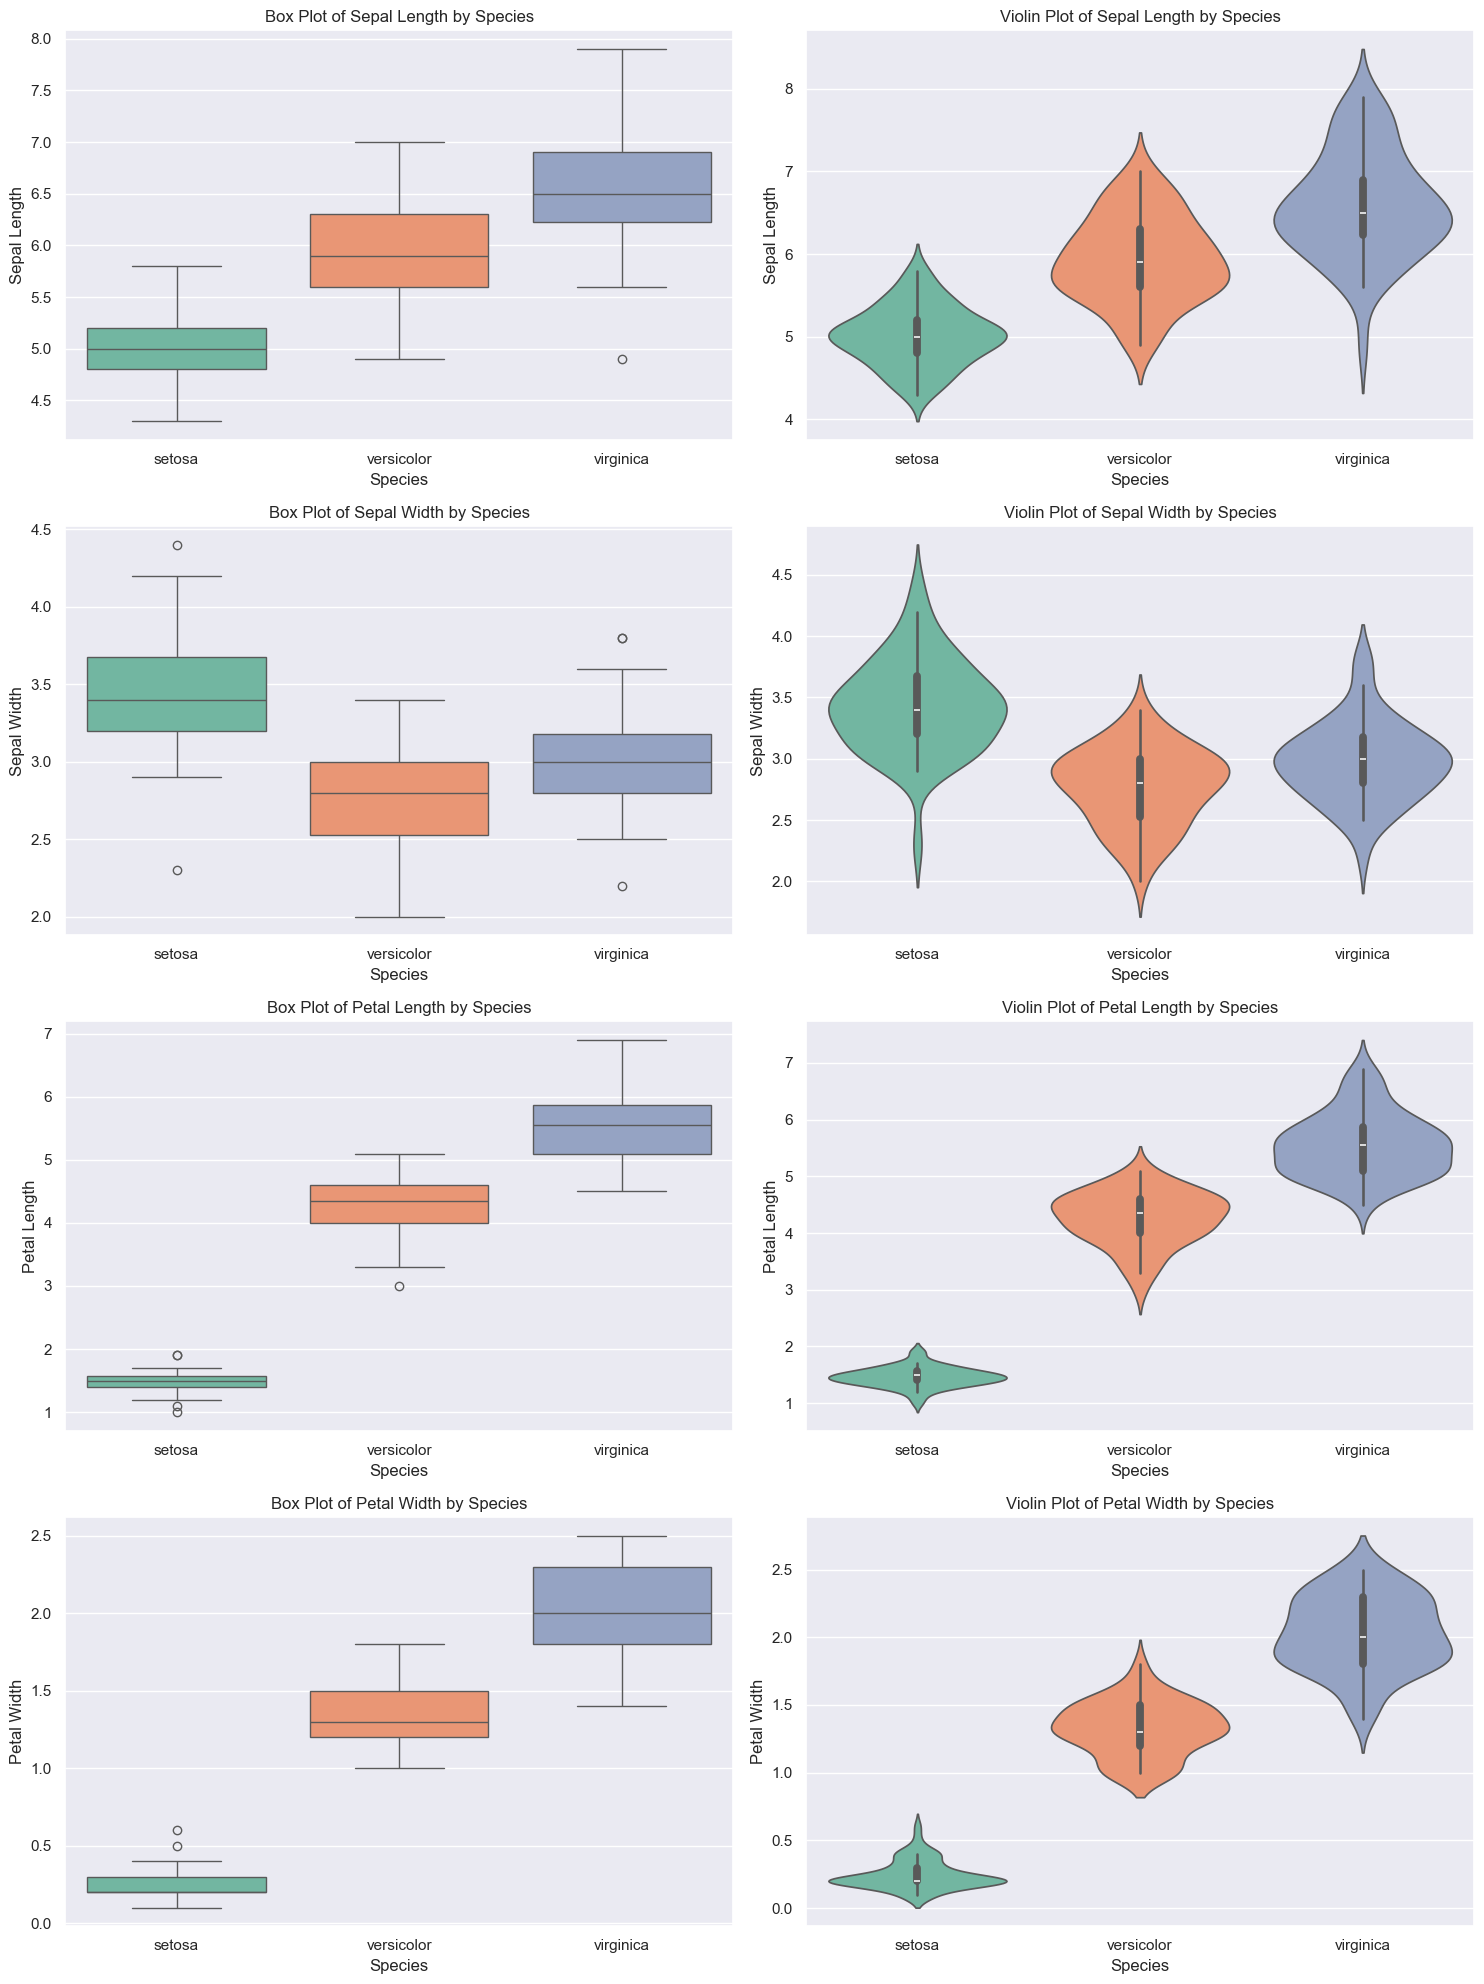

In [25]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

for i, feature in enumerate(features):
    # Box Plot - using hue='species' and legend=False to address FutureWarnings
    sns.boxplot(ax=axes[i, 0], data=df, x='species', y=feature, hue='species', palette='Set2', legend=False)
    axes[i, 0].set_title(f'Box Plot of {feature.replace("_", " ").title()} by Species')
    axes[i, 0].set_xlabel('Species')
    axes[i, 0].set_ylabel(feature.replace("_", " ").title())

    # Violin Plot - using hue='species' and legend=False to address FutureWarnings
    sns.violinplot(ax=axes[i, 1], data=df, x='species', y=feature, hue='species', palette='Set2', legend=False)
    axes[i, 1].set_title(f'Violin Plot of {feature.replace("_", " ").title()} by Species')
    axes[i, 1].set_xlabel('Species')
    axes[i, 1].set_ylabel(feature.replace("_", " ").title())

plt.tight_layout()
plt.show()

### Generate Combined Box Plot

Generate a single seaborn box plot for all four numerical features (sepal_length, sepal_width, petal_length, and petal_width) of the Iris dataset to facilitate outlier detection across all variables.

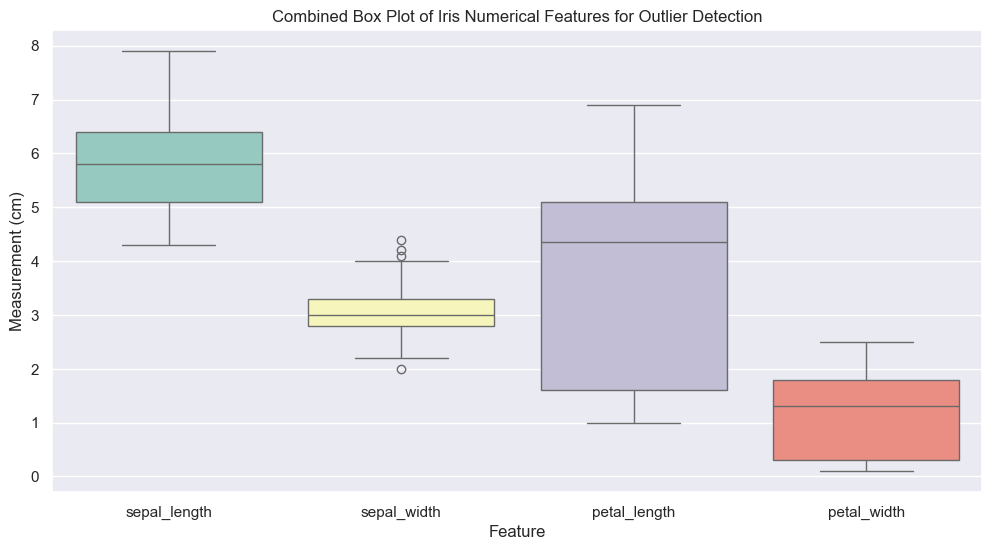

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a single box plot for all numerical features
sns.boxplot(data=df.drop(columns='species'), palette='Set3')

# Add title and labels
plt.title('Combined Box Plot of Iris Numerical Features for Outlier Detection')
plt.ylabel('Measurement (cm)')
plt.xlabel('Feature')

# Display the plot
plt.show()

### Summary:

#### Q&A
**How can outliers be identified across all numerical features in the Iris dataset simultaneously?**
By creating a combined box plot using Seaborn for the four numerical variables (`sepal_length`, `sepal_width`, `petal_length`, and `petal_width`), outliers can be visually detected as points falling outside the whiskers (typically 1.5 times the interquartile range).

#### Data Analysis Key Findings
*   The Iris dataset contains four primary numerical features: `sepal_length`, `sepal_width`, `petal_length`, and `petal_width`.
*   A visual inspection via box plots reveals that `sepal_width` is the only feature that consistently exhibits outliers when the dataset is viewed as a whole.
*   There is a notable variance in the distribution scales; `petal_length` displays the widest range of values compared to the other three features.
*   The median values for `petal_length` and `petal_width` are significantly lower than those for `sepal_length`, reflecting the different physical proportions of the flower parts.



Visualize the Iris dataset by creating a multi-line plot for numerical features, a pie chart of species distribution, histograms for measurement frequencies, and bar charts for mean values across species, then provide an educational guide on the usage and interpretation of these chart types in data analysis.

### Generate Line and Pie Charts

Create a multi-line plot for numerical features and a pie chart for species distribution to visualize measurement variations and proportions.



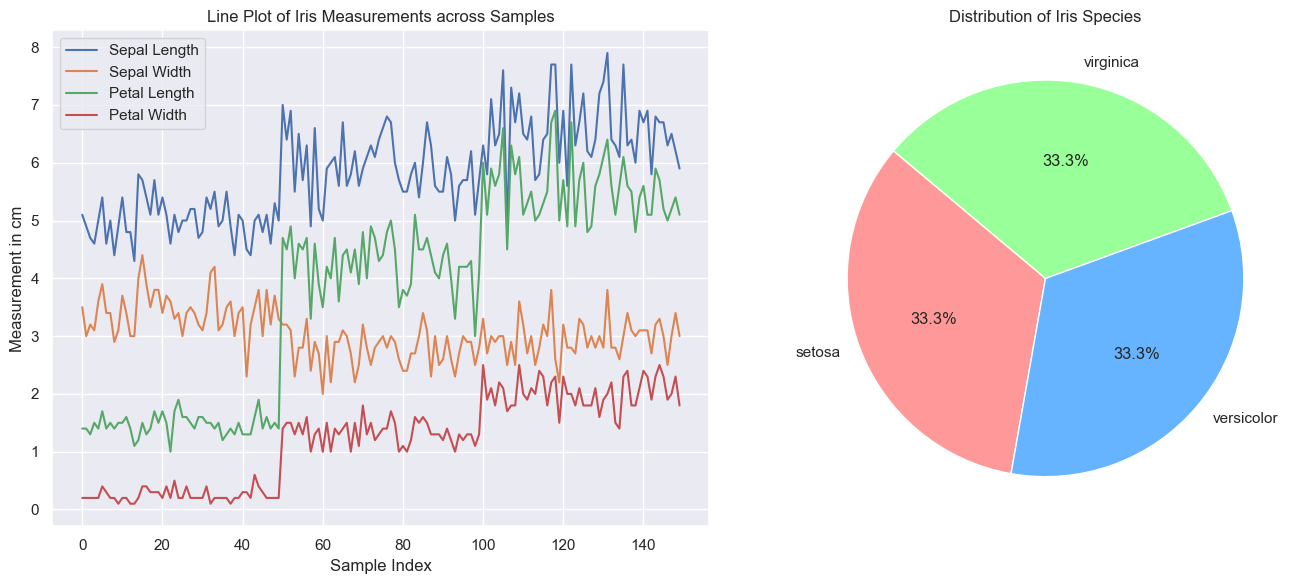

In [27]:
import matplotlib.pyplot as plt

# 1 & 2. Generate multi-line plot for numerical features
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(df.index, df['sepal_length'], label='Sepal Length')
plt.plot(df.index, df['sepal_width'], label='Sepal Width')
plt.plot(df.index, df['petal_length'], label='Petal Length')
plt.plot(df.index, df['petal_width'], label='Petal Width')
plt.title('Line Plot of Iris Measurements across Samples')
plt.xlabel('Sample Index')
plt.ylabel('Measurement in cm')
plt.legend()

# 3, 4 & 5. Generate pie chart for species distribution
plt.subplot(1, 2, 2)
species_counts = df['species'].value_counts()
species_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Iris Species')
plt.ylabel('') # Remove y-label for better aesthetics

plt.tight_layout()
plt.show()

### Generate Histograms and Bar Charts

Generate histograms for numerical features to show frequency distributions, and bar charts to compare the mean values of each measurement across the three species.

Generate a 2x2 grid of histograms for the Iris numerical features to visualize their distributions, followed by a 2x2 grid of bar charts to compare the mean values of these features across different species.


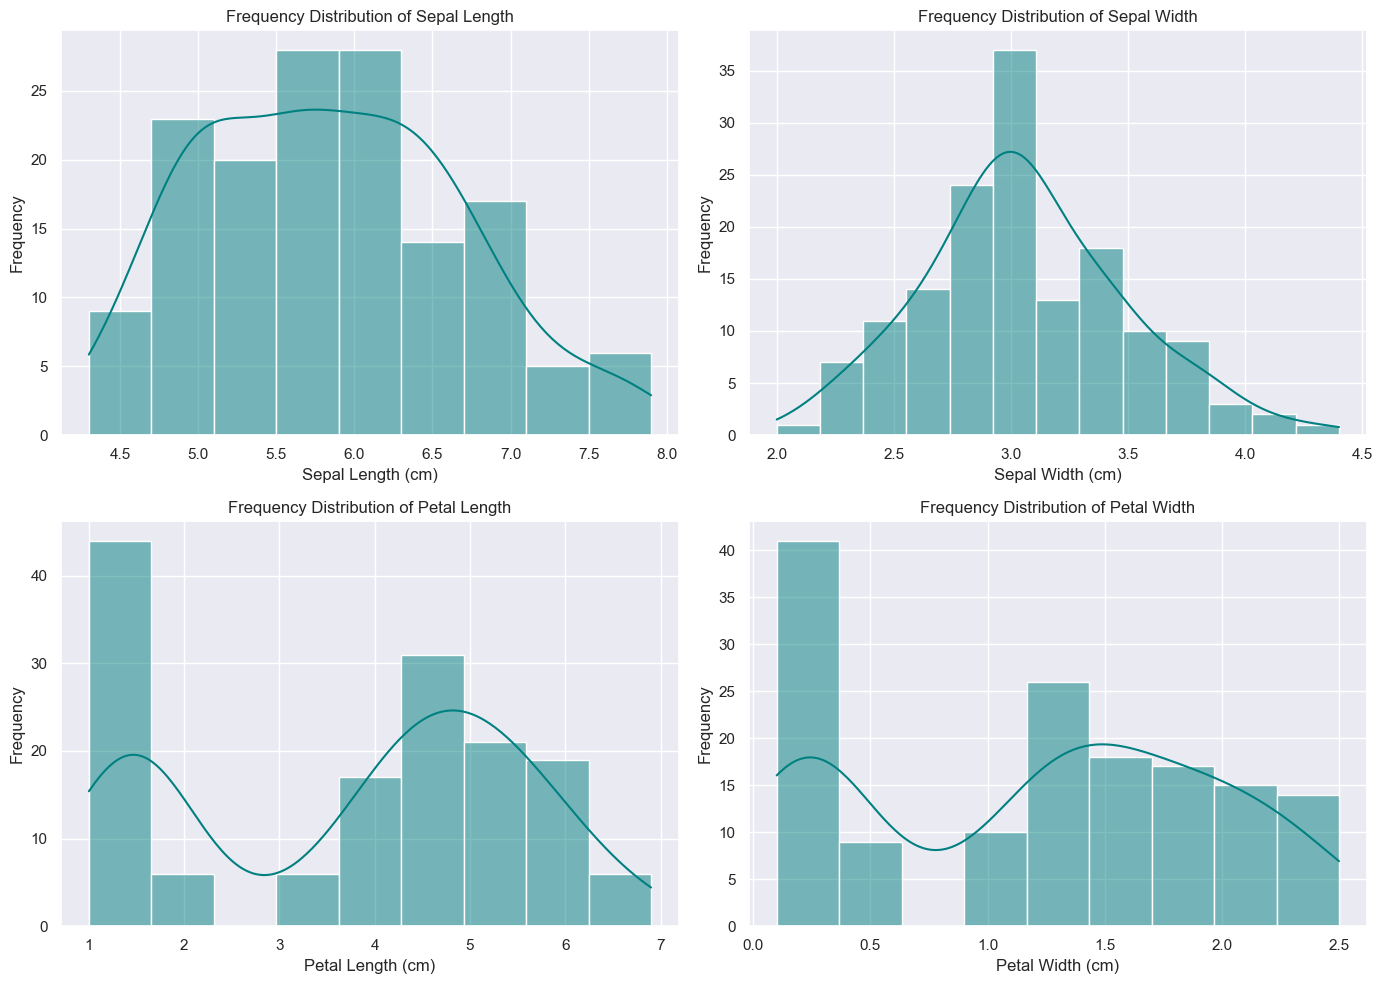

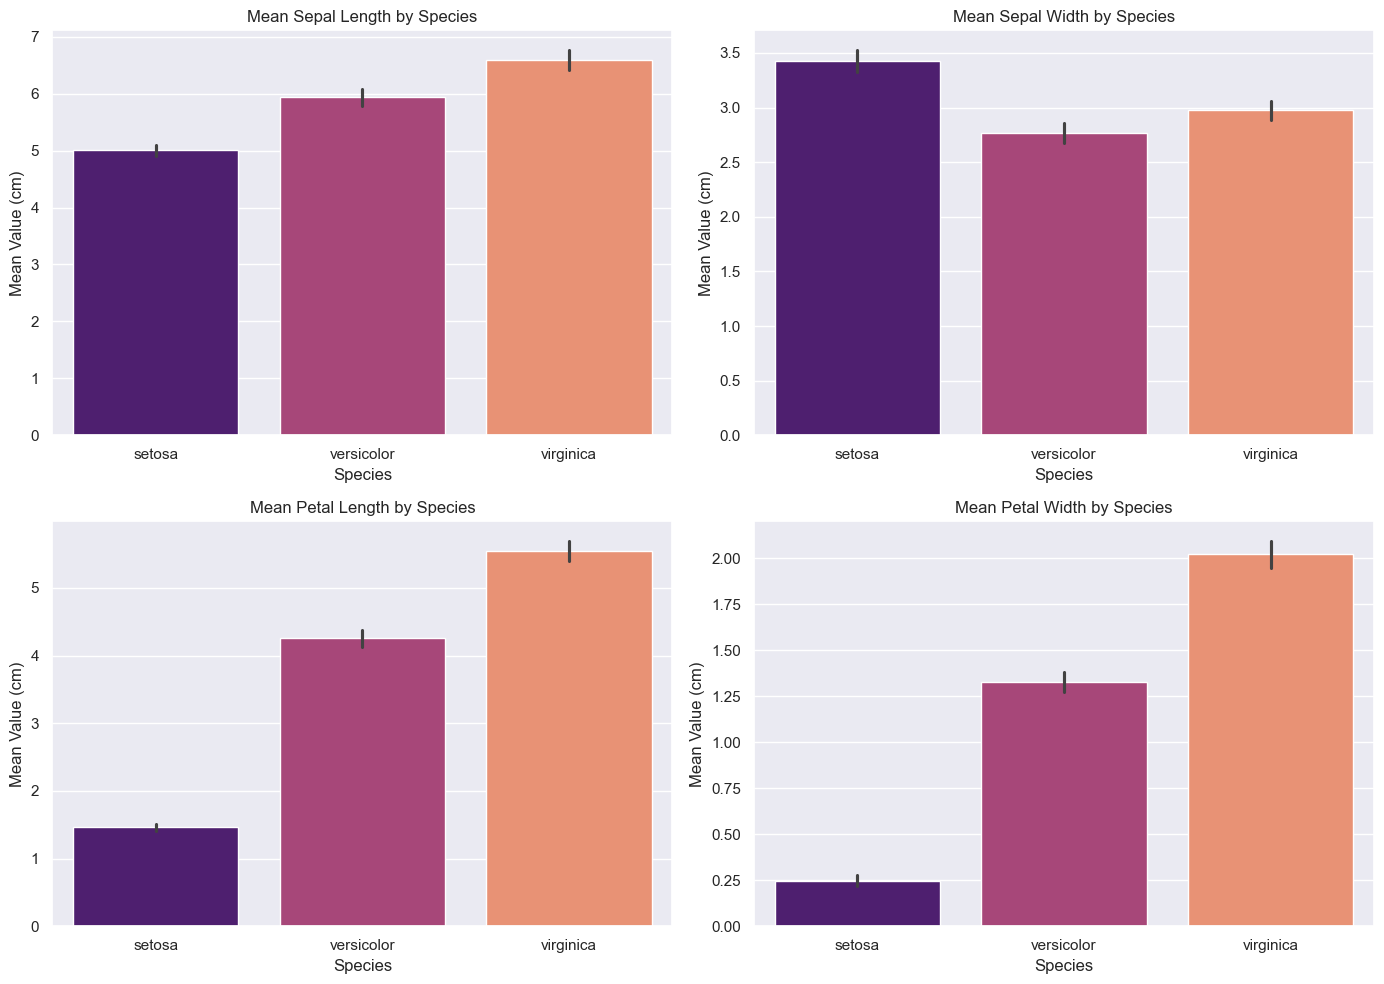

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a 2x2 grid of subplots for histograms
fig_hist, axes_hist = plt.subplots(2, 2, figsize=(14, 10))
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    sns.histplot(df[feature], kde=True, ax=axes_hist[row, col], color='teal')
    axes_hist[row, col].set_title(f'Frequency Distribution of {feature.replace("_", " ").title()}')
    axes_hist[row, col].set_xlabel(feature.replace("_", " ").title() + ' (cm)')
    axes_hist[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Create a second set of visualizations (2x2 grid) for mean comparisons across species
fig_bar, axes_bar = plt.subplots(2, 2, figsize=(14, 10))

for i, feature in enumerate(features):
    row, col = i // 2, i % 2
    sns.barplot(data=df, x='species', y=feature, ax=axes_bar[row, col], palette='magma', hue='species', legend=False)
    axes_bar[row, col].set_title(f'Mean {feature.replace("_", " ").title()} by Species')
    axes_bar[row, col].set_xlabel('Species')
    axes_bar[row, col].set_ylabel('Mean Value (cm)')

plt.tight_layout()
plt.show()

### Visualization Analysis Summary

#### Frequency Distributions (Histograms)
* **Sepal Width**: Displays a relatively normal distribution centered around 3.0 cm.
* **Petal Length and Petal Width**: Exhibit strong bimodal distributions. The smaller peaks correspond to the *setosa* species, while the larger peaks represent the overlapping distributions of *versicolor* and *virginica*.
* **Sepal Length**: Shows a broader, more continuous distribution compared to the petal measurements.

#### Species Mean Comparisons (Bar Charts)
* **Petal Measurements**: *Iris-virginica* has significantly higher mean petal length and width compared to *versicolor*, with *setosa* having the smallest measurements.
* **Sepal Length**: *Iris-virginica* also leads in mean sepal length.
* **Sepal Width**: Interestingly, *Iris-setosa* has the highest mean sepal width, being the only feature where it exceeds the other two species.

These plots confirm that petal measurements are the most effective features for distinguishing between the three iris species.

### Visualization Analysis Summary

#### Frequency Distributions (Histograms)
* **Sepal Width**: Displays a relatively normal distribution centered around 3.0 cm.
* **Petal Length and Petal Width**: Exhibit strong bimodal distributions. The smaller peaks correspond to the *setosa* species, while the larger peaks represent the overlapping distributions of *versicolor* and *virginica*.
* **Sepal Length**: Shows a broader, more continuous distribution compared to the petal measurements.

#### Species Mean Comparisons (Bar Charts)
* **Petal Measurements**: *Iris-virginica* has significantly higher mean petal length and width compared to *versicolor*, with *setosa* having the smallest measurements.
* **Sepal Length**: *Iris-virginica* also leads in mean sepal length.
* **Sepal Width**: Interestingly, *Iris-setosa* has the highest mean sepal width, being the only feature where it exceeds the other two species.

These plots confirm that petal measurements are the most effective features for distinguishing between the three iris species.

### Summary:

#### Q&A

**How are the Iris species distributed in the dataset?**
The dataset is perfectly balanced. Each of the three species—Setosa, Versicolor, and Virginica—represents exactly 33.3% of the total 150 samples.

**Which physical features are most effective for distinguishing between the species?**
Petal measurements (length and width) are the most effective. These features exhibit bimodal distributions in histograms, indicating clear separation between species, particularly Setosa compared to the others. Bar charts further confirm that Virginica has significantly larger petals than Versicolor, which in turn has larger petals than Setosa.

**What are the specific purposes and strengths of the chart types used in this analysis?**
*   **Line Charts:** Used to visualize measurements across individual samples. They are best for identifying trends, variations, and relative scales of continuous numerical data.
*   **Pie Charts:** Used to show the proportional distribution of categories within a whole. They are most effective when comparing a small number of categories to see if the dataset is balanced.
*   **Histograms (with KDE):** Used to visualize the frequency distribution and "shape" of numerical data. They help identify whether data is normally distributed or contains multiple peaks (multimodal), suggesting underlying groups.
*   **Bar Charts:** Used to compare summary statistics (like means) across discrete categories. They are excellent for identifying which categories outperform or underperform others in specific metrics.

#### Data Analysis Key Findings

*   **Balanced Classes:** The value counts for the species category confirmed a uniform distribution, with exactly 50 samples for each species.
*   **Bimodal Distributions:** Histograms for petal length and petal width showed two distinct peaks. The smaller, isolated peak represents the Setosa species, while the larger peak represents the combined, slightly overlapping distributions of Versicolor and Virginica.
*   **Sepal Width Anomaly:** While Setosa is the smallest in almost every other measurement, it uniquely possesses the highest mean sepal width (approx. 3.4 cm) compared to the other two species.
*   **Feature Dominance:** Virginica consistently ranks highest in mean sepal length, petal length, and petal width, making it the physically largest species overall in this dataset.



#### Data spliting

split the data into a training set (80%) and a test set (20%) using train_test_split with shuffling enabled.

In [29]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
X = df.drop(columns='species')
y = df['species']

# Splitting the dataset into 80% training and 20% testing with shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (120, 4)
Test set shape: (30, 4)


The data has been successfully split! We now have 120 samples in the training set and 30 samples in the test set, maintaining the 80/20 ratio with shuffling applied.

## Model Selection and optimization.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
# Increasing max_iter to ensure convergence
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Random Forest Classifier

We will now train a Random Forest model to see how it compares to the Logistic Regression model.

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Additional Algorithms: SVM and KNN

In [32]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
svm_model = SVC(kernel='linear', random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train and evaluate SVM
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

# Train and evaluate KNN
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)

print(f"Support Vector Machine Accuracy: {svm_acc:.4f}")
print(f"K-Nearest Neighbors Accuracy: {knn_acc:.4f}")

print("\nDetailed Report for SVM:")
print(classification_report(y_test, svm_pred))

Support Vector Machine Accuracy: 1.0000
K-Nearest Neighbors Accuracy: 1.0000

Detailed Report for SVM:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Model Evaluation

I have selected the Random Forest model for evaluation. I'll generate a full suite of metrics—including a confusion matrix and classification report—and then save the model to a file named 'iris_rf_model.pkl' for you to use later.

--- Random Forest Evaluation Metrics ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



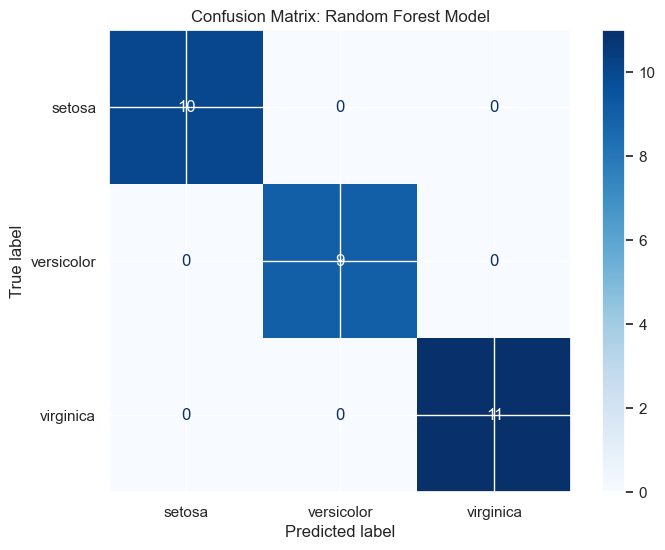


Model successfully saved as iris_rf_model.joblib


In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import joblib
import matplotlib.pyplot as plt

# 1. Generate Evaluation Metrics
print("--- Random Forest Evaluation Metrics ---")
rf_predictions = rf_model.predict(X_test)

# Print Classification Report
print(classification_report(y_test, rf_predictions))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, rf_predictions, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix: Random Forest Model')
plt.show()

# 2. Save the model
# Note: .h5 is for Keras. Scikit-learn models are typically saved using joblib or pickle.
model_filename = 'iris_rf_model.joblib'
joblib.dump(rf_model, model_filename)

import os
if os.path.exists(model_filename):
    print(f"\nModel successfully saved as {model_filename}")

## Model Deployement

we can use built-in Colab widgets. This creates a simple interactive form right here in the notebook to predict the Iris species using your saved model.


In [34]:
import joblib
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load the saved model
model = joblib.load('iris_rf_model.joblib')

# Create input widgets
sl = widgets.FloatSlider(value=5.0, min=4.0, max=8.0, step=0.1, description='Sepal Len:')
sw = widgets.FloatSlider(value=3.0, min=2.0, max=4.5, step=0.1, description='Sepal Wid:')
pl = widgets.FloatSlider(value=1.5, min=1.0, max=7.0, step=0.1, description='Petal Len:')
pw = widgets.FloatSlider(value=0.2, min=0.1, max=2.5, step=0.1, description='Petal Wid:')
button = widgets.Button(description='Predict Species', button_style='success')
output = widgets.Output()

def on_button_clicked(b):
    with output:
        clear_output()
        input_df = pd.DataFrame([[sl.value, sw.value, pl.value, pw.value]],
                                columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
        pred = model.predict(input_df)[0]
        print(f'Predicted Species: {pred.upper()}')

button.on_click(on_button_clicked)

print('--- Simple Iris Predictor ---')
display(sl, sw, pl, pw, button, output)

--- Simple Iris Predictor ---


FloatSlider(value=5.0, description='Sepal Len:', max=8.0, min=4.0)

FloatSlider(value=3.0, description='Sepal Wid:', max=4.5, min=2.0)

FloatSlider(value=1.5, description='Petal Len:', max=7.0, min=1.0)

FloatSlider(value=0.2, description='Petal Wid:', max=2.5, min=0.1)

Button(button_style='success', description='Predict Species', style=ButtonStyle())

Output()


I've created a simple interactive predictor for you right here in the notebook! You can now use the sliders to adjust the sepal and petal measurements, then click the 'Predict Species' button to see the model's result immediately below. This is a much simpler way to interact with your Random Forest model without needing any external tunnels or web apps.